In [1]:
%pylab inline
from functools import partial
import pickle

import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

Populating the interactive namespace from numpy and matplotlib


# Part 1

## 1.1 Linear Regression

###   1.

In [2]:
# Independent variable
x = [1, 2, 3, 4]

# Number of samples
m = len(x)

# Number of features
n = 1

# Build feature matrix
X = np.array(x, dtype=np.float64)
X.shape = (m, n)

# Observations
y_train = np.array([3, 2, 0, 5], dtype=np.float64)
y_train.shape = (1, m)

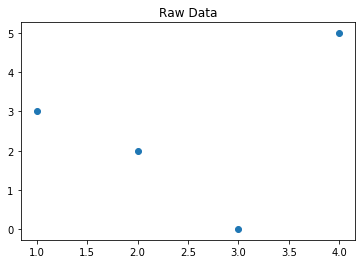

In [3]:
title("Raw Data")
scatter(X, y_train)
show()

In [4]:
def polynomial_feature_map(X, k=2):
    """
    Number of features, n = 1.
    """
    m, n = X.shape
    
    phi = np.zeros(shape=(m, k))
    
    for i, x in enumerate(X):
        mapped_feature = np.zeros(shape=(k))
        for j in range(k):
            mapped_feature[j] = x**j
        
        phi[i] = mapped_feature
    
    return np.matrix(phi)

In [5]:
def condition_number(X):
    """
    Find condition number resulting from design matrix
    """
    tmp = np.matrix(np.matmul(X.T, X))
    
    return np.linalg.cond(tmp)

In [6]:
def linear_regression(Phi, y_train):
    """
    Apply normal equations to find weights
    """

    a = np.matrix(np.matmul(Phi.T, Phi))
    b = np.matrix(np.matmul((Phi.T), y_train.T))

    w = np.matmul(a.I, b)
    
    return w

In [7]:
def polynomial(x, k, *w):
    """
    Apply polynomial weights derived from normal equations.
    """
    result = np.zeros_like(x)
    for i, sample in enumerate(x):
        res = 0
        for j in range(k):
            res += w[j]*sample**j
        result[i] = res

    return result

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


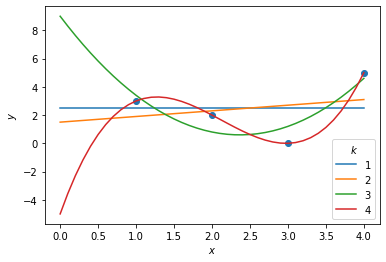

In [10]:
# Plot raw data points
figure()
scatter(X, y_train)

# Test data
x_test = np.arange(0, 4.1, 0.1)

# Plot each model
for i in range(1, 5):
    Phi = polynomial_feature_map(X, k=i)
    w = linear_regression(Phi, y_train)
    y_hat = polynomial(x_test, len(w), *w)
    plot(x_test, y_hat, label=i)
    
# title('Linear Regression With Different Feature Maps')
legend(title='$k$')
xlabel('$x$')
ylabel('$y$')
savefig('fig1.eps')
show()

In [11]:
# Weights for k=1 to k=3

for k in range(1, 4):
    Phi = polynomial_feature_map(X, k)
    w = linear_regression(Phi, y_train)
    print(f"k={k}")
    print("**********")
    print(w)
    print("**********")


k=1
**********
[[2.5]]
**********
k=2
**********
[[1.5]
 [0.4]]
**********
k=3
**********
[[ 9. ]
 [-7.1]
 [ 1.5]]
**********


In [12]:
def sse(y, y_hat):    
    
    if type(y) is not np.ndarray or type(y_hat) is not np.ndarray:
        raise TypeError('Must input numpy arrays!')
        
    if y.shape != y_hat.shape:
        raise ValueError('Arrays must be of the same shape!')

    return sum((y-y_hat)**2)

def mse(y, y_hat):

    return sse(y, y_hat)/len(y_hat)

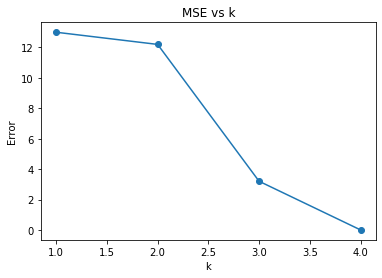

In [13]:
error_vec = []

for k in range(1, 5):
    Phi = polynomial_feature_map(X, k)
    w = linear_regression(Phi, y_train)
    y_hat = polynomial(X, len(w), *w).reshape(y_train.shape)    
    error_vec.append(mse(y_train, y_hat))

title("MSE vs k")
plot(range(1, 5), error_vec, '-o')
xlabel('k')
ylabel('Error')
savefig('fig2.eps')
show()

###   2.

In [14]:
def g_sigma(x, sigma):
    epsilon = np.random.normal(scale=sigma, size=x.size)
    return np.sin(2*np.pi*x)**2 + epsilon

def exact(x):
    return np.sin(2*np.pi*x)**2

In [15]:
random.seed(4)
x_sample_30 = np.random.random(size=30)
x = np.arange(0, 1, 0.01)
g_sigma_noise = partial(g_sigma, sigma=0.07)
y_sample_30 = g_sigma_noise(x_sample_30)

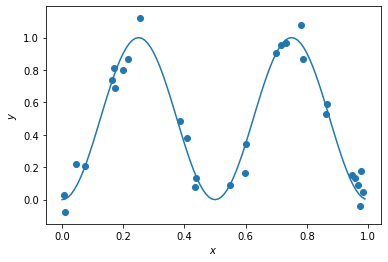

In [16]:
# title("Raw Data points and Exact Solution")
figure()
scatter(x_sample_30, y_sample_30)
plot(x, exact(x))
xlabel('$x$')
ylabel('$y$')
savefig('fig3.eps')
show()

In [17]:
m = len(x_sample_30)
n = 1

X_train = np.array(x_sample_30)
X_train.shape = (m, n)
y_train = y_sample_30
y_train.shape = (1, m)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

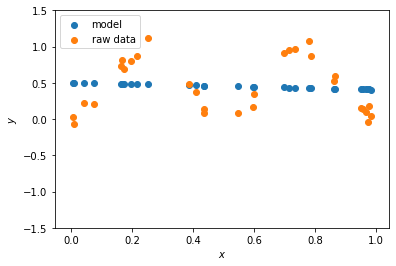

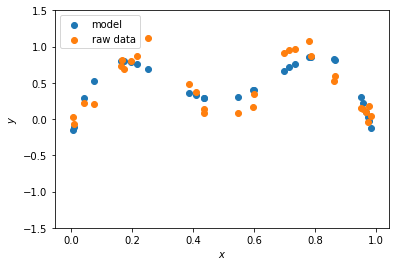

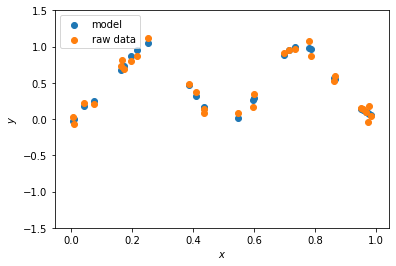

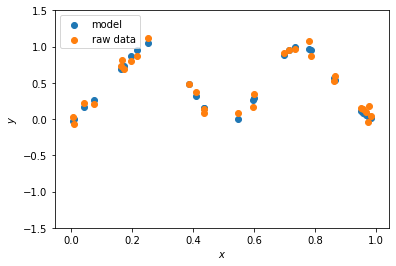

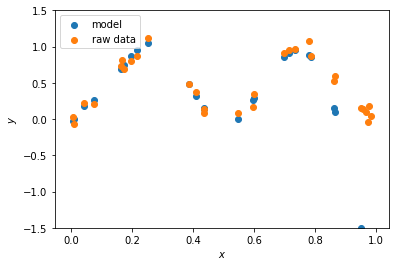

In [18]:
k_vector = [2, 5, 10, 14, 18]

for k in k_vector:
    figure()
#     title(f'k={k}')
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    scatter(x_sample_30, polynomial(x_sample_30, len(w), *w),label='model',)
    scatter(x_sample_30, y_sample_30, label='raw data')
    legend(loc='best')
    ylim((-1.5, 1.5))
    xlabel('$x$')
    ylabel('$y$')
    savefig(f'fig_k_{k}.eps')
show()

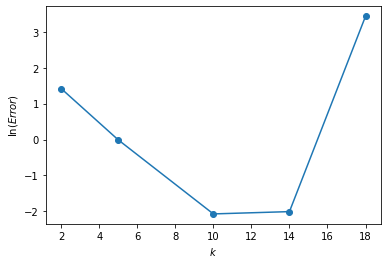

In [19]:
m = len(x_sample_30)
n = 1

X_train = np.array(x_sample_30)
X_train.shape = (m, n)
y_train = y_sample_30
y_train.shape = (1, m)

training_error_vec = []
condition_number_vec = []
k_vector = [2, 5, 10, 14, 18]
for k in k_vector:
    Phi = polynomial_feature_map(X_train, k)
    condition_number_vec.append(condition_number(Phi))
    w = linear_regression(Phi, y_train)
    y_hat = polynomial(x_sample_30, len(w), *w).reshape(y_sample_30.shape)
    error = mse(y_sample_30, y_hat)
    training_error_vec.append(np.log(error))

# title("Training Error Vs $k$")
plot(k_vector, training_error_vec, '-o')
xlabel('$k$')
ylabel('$\ln(Error)$')
savefig('fig4.eps')
show()

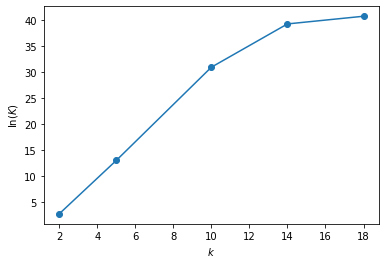

In [20]:
plot(k_vector, log(condition_number_vec), '-o')

ylabel('$\ln(K)$')
xlabel('$k$')
savefig('fig5.eps')
show()

The increasing error with K is due to the ill-conditioned matrix for large K values

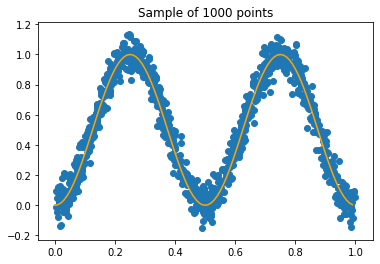

In [21]:
random.seed(42)
x_sample_1000 = np.random.random(size=1000)
g_partial = partial(g_sigma, sigma=0.07)
y_sample_1000 = g_partial(x_sample_1000)

scatter(x_sample_1000, y_sample_1000)

x = np.arange(0, 1, 0.01)
y = np.sin(2*np.pi*x)**2

plot(x, y, color='orange')
title("Sample of 1000 points")
show()

In [22]:
m = len(x_sample_1000)
n = 1

X_test = np.array(x_sample_1000)
X_test.shape = (m, n)
y_test = y_sample_1000
y_test.shape = (1, m)

In [23]:
test_error_vec = []
k_vector = arange(2,18,1)

for k in k_vector:
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    y_hat = polynomial(x_sample_1000, len(w), *w).reshape(y_test.shape)
    error = mse(y_test, y_hat)
    test_error_vec.append(np.log(error))

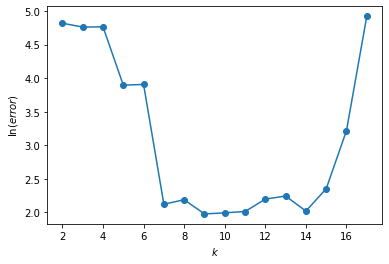

In [24]:
# title("Test Error Vs $k$")
plot(k_vector, test_error_vec, '-o')
ylabel("$\ln(error)$")
xlabel("$k$")
savefig('fig6.eps')
show()

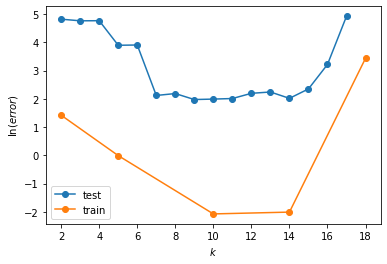

In [25]:
plot(k_vector, test_error_vec, '-o', label='test')
plot([2, 5, 10, 14, 18], training_error_vec, '-o', label='train')
ylabel("$\ln(error)$")
xlabel("$k$")
legend()


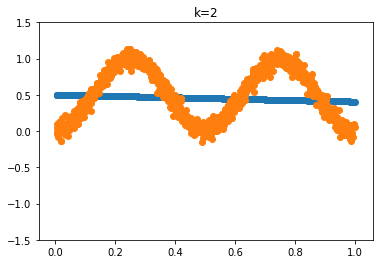

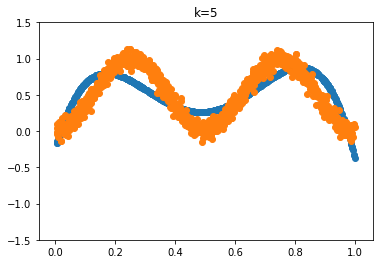

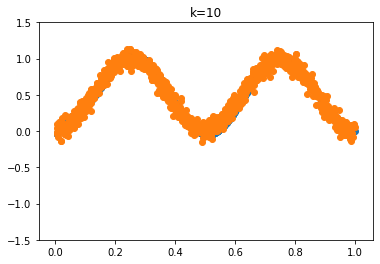

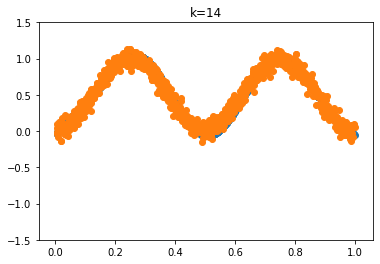

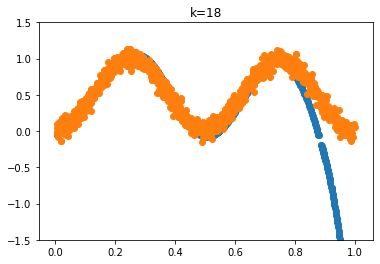

In [26]:
k_vector = [2, 5, 10, 14, 18]

for k in k_vector:
    figure()
    title(f'k={k}')
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)

    scatter(x_sample_1000, polynomial(x_sample_1000, len(w), *w), label=k)
    scatter(x_sample_1000, y_sample_1000)

    ylim((-1.5, 1.5))
show()

In [27]:
def error_experiment(
    feature_map,
    basis,
    x_sample_train,
    y_sample_train,
    x_sample_test,
    y_sample_test,
    k_vector
):
    m = len(x_sample_train)
    n = 1

    X = np.array(x_sample_train)
    X.shape = (m, n)
    y = y_sample_train
    y.shape = (1, m)

    train_error_vec = []
    test_error_vec = []
    
    for k in k_vector:
        
        # Run regression
        Phi = feature_map(X, k)
        w = linear_regression(Phi, y)
        
        # Calculate training error
        y_hat_train = basis(x_sample_train, len(w), *w).reshape(y_sample_train.shape)
        train_error = mse(y_sample_train, y_hat_train)
        train_error_vec.append(train_error)
        
        # Calculate test error
        y_hat_test = basis(x_sample_test, len(w), *w).reshape(y_sample_test.shape)
        test_error = mse(y_sample_test, y_hat_test)
        test_error_vec.append(test_error)
    
    return train_error_vec, test_error_vec


def runner(feature_map, basis, k_vector, nruns=5):
    """
    Function runner
    """
    
    results = []
    test_error_vec = []
    train_error_vec = []
    
    run_counter = nruns

    while run_counter > 0:
        try:
            x_sample_train = np.random.random(size=30)
            y_sample_train = g_sigma_noise(x_sample_train)

            x_sample_test = np.random.random(size=1000)
            y_sample_test = g_sigma_noise(x_sample_test)
            
            train_error, test_error = error_experiment(feature_map,
                                                       basis,
                                                       x_sample_train,
                                                       y_sample_train, 
                                                       x_sample_test,
                                                       y_sample_test,                             
                                                       k_vector,
                                                      )

            test_error_vec.append(test_error)
            train_error_vec.append(train_error)
            
            run_counter -= 1
            
            print(f'{100-(100*run_counter/nruns):.1f} % complete')
            
        except LinAlgError:
            # generated a close to singular matrix causing failure
            # of experiment
            pass
        
    return np.array(train_error_all), np.array(test_error_all)

In [28]:
#  Takes a long time!

# train_results, test_results = runner(
#     polynomial_feature_map, polynomial, k_vector=arange(2,19), nruns=100)

# with open('train_results_polynomial.pkl', 'wb') as f:
#     pickle.dump(train_results, f)

# with open('test_results_polynomial.pkl', 'wb') as f:
#     pickle.dump(test_results, f)

In [29]:
with open('train_results_polynomial.pkl', 'rb') as f:
    train_results = pickle.load(f)
    
with open('test_results_polynomial.pkl', 'rb') as f:
    test_results = pickle.load(f)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


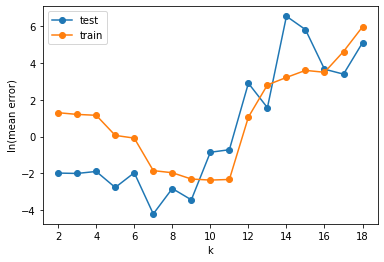

In [30]:
plot(arange(2,19), np.log(test_results.mean(axis=0)), '-o', label='test')
plot(arange(2,19), np.log(train_results.mean(axis=0)), '-o', label='train')
xlabel('k')
ylabel('ln(mean error)')
legend()
savefig('fig8.eps')
show()

### 3.

In [31]:
def sinusoidal_feature_map(X, k=2):
    """
    Number of features, n = 1.
    """
    m, n = X.shape
    
    phi = np.zeros(shape=(m, k))
    
    for i, x in enumerate(X):
        mapped_feature = np.zeros(shape=(k))
        for j in range(k):
            mapped_feature[j] = np.sin((j+1)*np.pi*x)
        
        phi[i] = mapped_feature
    
    return np.matrix(phi)

In [32]:
def sinusoidal(x, k, *w):
    """
    Apply sinusoidal weights derived from normal equations.
    """
    result = np.zeros_like(x)
    for i, sample in enumerate(x):
        res = 0
        for j in range(k):
            res += w[j]*np.sin((j+1)*np.pi*sample)
        result[i] = res

    return result

In [33]:
# #  Takes a long time to run

# train_results, test_results = runner(
#     sinusoidal_feature_map, sinusoidal, k_vector=arange(2,19), nruns=100)

# with open('train_results_sinusoidal.pkl', 'wb') as f:
#     pickle.dump(train_results, f)

# with open('test_results_sinusoidal.pkl', 'wb') as f:
#     pickle.dump(test_results, f)

In [34]:
with open('train_results_sinusoidal.pkl', 'rb') as f:
    train_results = pickle.load(f)
    
with open('test_results_sinusoidal.pkl', 'rb') as f:
    test_results = pickle.load(f)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


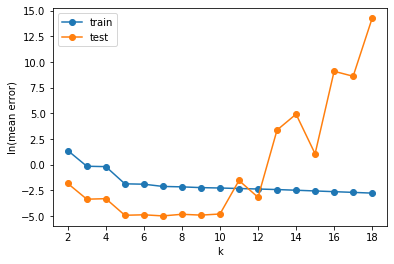

In [35]:
plot(arange(2,19,1), np.log(train_results.mean(axis=0)), '-o', label='train')
plot(arange(2,19,1), np.log(test_results.mean(axis=0)), '-o', label='test')
xlabel('k')
ylabel('ln(mean error)')
legend()
savefig('fig9.eps')


 ## 1.2 Boston housing and kernels

#### Data Preparation

In [36]:
# Load data
boston_dataset = sio.loadmat('data/boston.mat')
X, y = boston_dataset['boston'][:,:-1], boston_dataset['boston'][:, -1: ]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

m, n = X_train.shape

### 4.a Fitting with a constant function

Intuitively just finding the mean of the dataset.

In [37]:
training_ones = np.ones_like(y_train)
test_ones = np.ones_like(y_test)

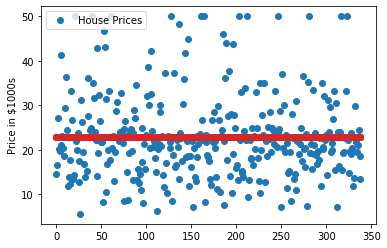

In [38]:
w = linear_regression(training_ones, y_train.T)
plot(y_train, 'o', label='House Prices')
plot(polynomial(X_train, len(w), *w), 'o')
legend()
ylabel('Price in $1000s')
show()

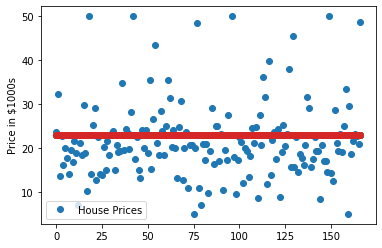

In [39]:
w = linear_regression(training_ones, y_train.T)
plot(y_test, 'o', label='House Prices')
plot(polynomial(X_test, len(w), *w), 'o')
legend()
ylabel('Price in $1000s')
show()

In [40]:
mse_train = mse(y_train, polynomial(training_ones, len(w), *w))
mse_test = mse(y_test, polynomial(test_ones, len(w), *w))

In [41]:
print(f"MSE on the training data is {mse_train}")
print(f"MSE on the test data is {mse_test}")

MSE on the training data is 88.14436839219985
MSE on the test data is 77.43966001117039


#### Repeating 20 times

In [42]:
mse_train_naive = []
mse_test_naive = []
for i in range(20):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    m, n = X_train.shape
    
    training_ones = np.ones_like(y_train)
    test_ones = np.ones_like(y_test)
    
    w = linear_regression(training_ones, y_train.T)
    
    mse_train_naive.append(mse(y_train, polynomial(training_ones, len(w), *w)))
    mse_test_naive.append(mse(y_test, polynomial(test_ones, len(w), *w)))
    
    

In [43]:
print(f'Naive Regression & ${mean(mse_train_naive):.1f} \pm {np.std(mse_train_naive) :.1f}$ & ${mean(mse_test_naive):.1f} {np.std(mse_test_naive) :.1f}$ \\\\')




Naive Regression & $83.5 \pm 5.2$ & $86.6 10.7$ \\


#### b.

This is like finding the mean of the dependent variable data, or just the bias term.

#### c.

In [44]:
def identity_feature_map(X, k=None):
    """
    Identity feature map, add a bias term.
    """
   
    m, n = X.shape
    k = n + 1

    phi = np.zeros(shape=(m, k))
    
    for i, x in enumerate(X):
        mapped_feature = np.zeros(shape=(k))
        for j in range(k-1):
            mapped_feature[j] = x[j]
        
        # Add extra bias feature
        mapped_feature[-1] = 1
        
        phi[i] = mapped_feature
    
    return np.matrix(phi)
    

In [45]:
def identity_predictor(x, w):
    return np.dot(x, w)

In [46]:
# pick out nth feature
for n in range(0,13):
    # Reshape, and use identity feature map to add bias term
    feature_n = X_train[:,n].reshape(len(X_train), 1)
    mapped_feature_n = identity_feature_map(feature_n)
    w = linear_regression(mapped_feature_n, y_train.T)

    mapped_feature_n_test = identity_feature_map(X_test[:,n].reshape(len(X_test), 1))
    
    predictions_train = np.array([float(identity_predictor(feat, w)) for feat in mapped_feature_n])
    predictions_train = predictions_train.reshape((len(predictions_train), 1))

    mean_square_error_train =  mse(y_train, predictions_train)
    
    predictions_test = np.array([float(identity_predictor(feat, w)) for feat in mapped_feature_n_test])
    predictions_test = predictions_test.reshape((len(predictions_test), 1))

    mean_square_error_test =  mse(y_test, predictions_test)
    
    print(f'Linear Regression (Feature {n+1}) & {mean_square_error_train:.1f} & {mean_square_error_test:.1f} \\\\')


Linear Regression (Feature 1) & 58.9 & 98.7 \\
Linear Regression (Feature 2) & 62.0 & 97.7 \\
Linear Regression (Feature 3) & 52.9 & 89.2 \\
Linear Regression (Feature 4) & 68.6 & 109.3 \\
Linear Regression (Feature 5) & 57.4 & 93.3 \\
Linear Regression (Feature 6) & 41.3 & 49.8 \\
Linear Regression (Feature 7) & 59.6 & 99.4 \\
Linear Regression (Feature 8) & 65.9 & 106.7 \\
Linear Regression (Feature 9) & 58.6 & 100.1 \\
Linear Regression (Feature 10) & 52.1 & 94.3 \\
Linear Regression (Feature 11) & 51.8 & 85.4 \\
Linear Regression (Feature 12) & 62.4 & 101.4 \\
Linear Regression (Feature 13) & 32.9 & 51.4 \\


#### Repeating 20 times


In [47]:
# pick out kth feature
for k in range(0,13):
    
    mse_train = []
    mse_test = []

    for i in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
        m, n = X_train.shape
        
        # Reshape, and use identity feature map to add bias term
        feature_k = X_train[:,k].reshape(len(X_train), 1)
        mapped_feature_k = identity_feature_map(feature_k)
        w = linear_regression(mapped_feature_k, y_train.T)

        mapped_feature_k_test = identity_feature_map(X_test[:,k].reshape(len(X_test), 1))

        predictions_train = np.array([float(identity_predictor(feat, w)) for feat in mapped_feature_k])
        predictions_train = predictions_train.reshape((len(predictions_train), 1))

        mse_train.append(mse(y_train, predictions_train))

        predictions_test = np.array([float(identity_predictor(feat, w)) for feat in mapped_feature_k_test])
        predictions_test = predictions_test.reshape((len(predictions_test), 1))

        mse_test.append(mse(y_test, predictions_test))
        
    
    print(f'Linear Regression (Feature {k+1}) & ${mean(mse_train):.1f} \pm {np.std(mse_train) :.1f}$ & ${mean(mse_test):.1f} \pm {np.std(mse_test) :.1f}$ \\\\')
    
    

Linear Regression (Feature 1) & $70.7 \pm 5.4$ & $74.5 \pm 10.9$ \\
Linear Regression (Feature 2) & $72.1 \pm 5.0$ & $76.7 \pm 10.3$ \\
Linear Regression (Feature 3) & $64.0 \pm 5.2$ & $66.3 \pm 10.7$ \\
Linear Regression (Feature 4) & $80.4 \pm 5.0$ & $85.5 \pm 10.5$ \\
Linear Regression (Feature 5) & $68.1 \pm 5.2$ & $71.2 \pm 10.6$ \\
Linear Regression (Feature 6) & $43.7 \pm 2.5$ & $43.9 \pm 5.2$ \\
Linear Regression (Feature 7) & $71.4 \pm 5.6$ & $75.0 \pm 11.3$ \\
Linear Regression (Feature 8) & $78.1 \pm 5.5$ & $81.8 \pm 11.2$ \\
Linear Regression (Feature 9) & $71.5 \pm 5.6$ & $73.6 \pm 11.4$ \\
Linear Regression (Feature 10) & $65.3 \pm 5.5$ & $67.4 \pm 11.3$ \\
Linear Regression (Feature 11) & $62.1 \pm 4.2$ & $64.1 \pm 8.8$ \\
Linear Regression (Feature 12) & $74.2 \pm 4.9$ & $77.0 \pm 10.1$ \\
Linear Regression (Feature 13) & $37.5 \pm 2.5$ & $40.9 \pm 5.3$ \\


In [50]:
w_all_attributes = linear_regression(identity_feature_map(X_train), y_train.T)

In [51]:
predictions_all_attributes_test = [float(identity_predictor(feat, w_all_attributes)) for feat in identity_feature_map(X_test)]
predictions_all_attributes_test = np.array(predictions_all_attributes_test)
predictions_all_attributes_test = predictions_all_attributes_test.reshape(y_test.shape)
error_test = mse(predictions_all_attributes_test, y_test)

predictions_all_attributes_train = [float(identity_predictor(feat, w_all_attributes)) for feat in identity_feature_map(X_train)]

predictions_all_attributes_train = np.array(predictions_all_attributes_train)
predictions_all_attributes_train = predictions_all_attributes_train.reshape(y_train.shape)
error_train = mse(predictions_all_attributes_train, y_train)

print(f'Linear Regression (All features ) & {error_train:.1f} & {error_test:.1f} \\\\')


Linear Regression (All features ) & 19.1 & 29.8 \\


#### Run 20 times

In [52]:
mse_test_all = []
mse_train_all = []

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    m, n = X_train.shape
        
    w_all_attributes = linear_regression(identity_feature_map(X_train), y_train.T)
    
    predictions_all_attributes_test = [float(identity_predictor(feat, w_all_attributes)) for feat in identity_feature_map(X_test)]
    predictions_all_attributes_test = np.array(predictions_all_attributes_test)
    predictions_all_attributes_test = predictions_all_attributes_test.reshape(y_test.shape)
    mse_test_all.append(mse(predictions_all_attributes_test, y_test))

    predictions_all_attributes_train = [float(identity_predictor(feat, w_all_attributes)) for feat in identity_feature_map(X_train)]

    predictions_all_attributes_train = np.array(predictions_all_attributes_train)
    predictions_all_attributes_train = predictions_all_attributes_train.reshape(y_train.shape)
    mse_train_all.append(mse(predictions_all_attributes_train, y_train))
    
print(f'Linear Regression (All Features) & ${mean(mse_train_all):.1f} \pm {np.std(mse_train_all) :.1f}$ & ${mean(mse_test_all):.1f} \pm {np.std(mse_test_all) :.1f}$ \\\\')

Linear Regression (All Features) & $21.1 \pm 1.3$ & $24.9 \pm 3.0$ \\


## 1.3 Kernelised Ridge Regression

In [54]:
def gaussian_kernel(xi, xj, sigma=0.1):
    tmp = np.linalg.norm(x=(xi-xj),ord=2)
    return np.exp((-tmp**2)/(2*sigma**2))

In [55]:
def kernel_regression(X_train, y_train, m, sigma, gamma):
    K = np.zeros(shape=(m, m))

    for i in range(0, m):
        for j in range(0, m):
            K[i][j] = gaussian_kernel(X_train[i], X_train[j], sigma)
    
    # Convert to matrix for inversion
    K = np.matrix(K)
    
    # Run optimisation
    alpha_opt = np.matmul((K+(gamma*m*np.identity(m))).I, y_train)
    
    return alpha_opt

In [56]:
def kernel_predictor(X_train, X_test, alpha_opt, sigma):
    
    m, n = X_train.shape
    y_hat = []

    for i, x_test in enumerate(X_test):
        res = 0
        for j in range(m):
            res += float(alpha_opt[j]*gaussian_kernel(x_test, X_train[j], sigma))
        y_hat.append(res)

    return np.array(y_hat)

#### 5.a

In [57]:
# Load data
boston_dataset = sio.loadmat('data/boston.mat')
X, y = boston_dataset['boston'][:,:-1], boston_dataset['boston'][:, -1: ]

# Train/Test Split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=42)

m, n = X_train.shape

In [58]:
gamma_vector = np.array(
    [2**(i) for i in range(-40, -25, 1)]
)

sigma_vector = np.array(
    [2**(i) for i in linspace(7,13,13)]
)

In [59]:
# Choose parameters
sigma = sigma_vector[0]
gamma = gamma_vector[2]

# Learn
alpha_opt = kernel_regression(X_train, y_train, m, sigma, gamma)

# Predictions
predictions = kernel_predictor(X_train, X_test, alpha_opt, sigma)

#### Cross validation

In [60]:
parameters = [
    (sigma, gamma) 
    for sigma in sigma_vector
    for gamma in gamma_vector
]

In [61]:
print(f"There are {len(parameters)} parameter combinations")

There are 195 parameter combinations


In [62]:
def kfold_cross_validation(X, y, sigma, gamma, k=5):
    
    kf = KFold(n_splits=k)
    errors = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        m, n = X_train.shape

        alpha_opt = kernel_regression(
            X_train, y_train, m, sigma, gamma)
        

        y_hat = kernel_predictor(
            X_train, X_test, alpha_opt, sigma)
        y_hat = y_hat.reshape(y_test.shape)
        
        error = mse(y_test, y_hat)
        errors.append(error)
    
    return np.array(errors).mean()

#### Run cross validation experiments over all parameter combinations

In [63]:
# Takes a long time to run!

# cross_validation_results = []

# progress = 1
# for (s, g) in parameters:
    
#     progress +=1

#     print(f'* {100*progress/len(parameters):.2f}% complete')
#     print('*'*progress)
#     cross_validation_results.append(
#         (s, g, kfold_cross_validation(X, y, s, g))
#     )

# # Convert to array for ease of indexing
# cross_validation_results  = np.array(cross_validation_results)

# with open('cv_results.pkl', 'wb') as f:
#     pickle.dump(cross_validation_results, f)

In [64]:
with open('cv_results.pkl', 'rb') as f:
    cross_validation_results = pickle.load(f)

In [66]:
gamma_vector = np.array(
    [2**(i) for i in range(-40, -25, 1)]
)

sigma_vector = np.array(
    [2**(i) for i in linspace(7,13,13)]
)

In [67]:
z_vals = np.log(cross_validation_results[:,2])
z_vals = z_vals.reshape((13,15))

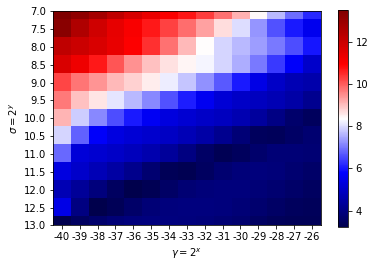

In [68]:
plt.imshow(z_vals,cmap='seismic')
colorbar()
xticks(arange(0,15), [f'{i}' for i in range(-40,-25,1)]) 
yticks(arange(0,13), [f'{i}' for i in linspace(7,13,13)]) 
xlabel('$\gamma=2^{x}$')
ylabel('$\sigma=2^{y}$')
savefig('cross_validation.eps')
show()

In [69]:
sigmas, gammas, cv_error = (
    cross_validation_results[:,0:1],
    cross_validation_results[:,1:2],
    cross_validation_results[:,2:]
)

In [70]:
idx_min = np.argmin(cross_validation_results[:,2])
sigma_best, gamma_best, cv_error_best = cross_validation_results[idx_min]
alpha_opt_best = kernel_regression(X_train, y_train, m, sigma_best, gamma_best)
predictions_best_test = kernel_predictor(X_train, X_test, alpha_opt_best, sigma_best)
predictions_best_train = kernel_predictor(X_train, X_train, alpha_opt_best, sigma_best)

In [71]:
test_error = mse(predictions_best_test.reshape(y_test.shape), y_test)
train_error = mse(predictions_best_train.reshape(y_train.shape), y_train)
print(f'Kernel Ridge Regression & {test_error:.1f} & {train_error:.1f} \\\\')

Kernel Ridge Regression & 12.4 & 11.2 \\


#### Run 20 times

In [ ]:
mse_kernel_test = []
mse_kernel_train = []

for i in range(20):
    
    X, y = boston_dataset['boston'][:,:-1], boston_dataset['boston'][:, -1: ]

    # Train/Test Split
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.33, random_state=i)

    m, n = X_train.shape
    
    idx_min = np.argmin(cross_validation_results[:,2])

    sigma_best, gamma_best, cv_error_best = cross_validation_results[idx_min]
    alpha_opt_best = kernel_regression(X_train, y_train, m, sigma_best, gamma_best)
    predictions_best_test = kernel_predictor(X_train, X_test, alpha_opt_best, sigma_best)
    predictions_best_train = kernel_predictor(X_train, X_train, alpha_opt_best, sigma_best)
    mse_kernel_test.append(mse(predictions_best_test.reshape(y_test.shape), y_test))
    mse_kernel_train.append(mse(predictions_best_train.reshape(y_train.shape), y_train))


In [ ]:
print(f'Kernel Ridge Regression & ${mean(mse_kernel_train):.1f} \pm {np.std(mse_kernel_train) :.1f}$ & ${mean(mse_kernel_test):.1f} \pm {np.std(mse_kernel_test) :.1f}$ \\\\')
